In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def load_pic(path):
    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image

In [3]:
def extract_channels(pic, picnum):
    chansize = pic.shape[0]//3
    chan1 = pic[:chansize,:]
    chan2 = pic[chansize:2*chansize,:]
    chan3 = pic[2*chansize:3*chansize,:]
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    fig.suptitle('Image %d'%picnum)
    axs[0].set_title('Red')
    axs[0].imshow(chan3, cmap='gray')
    axs[1].set_title('Green')
    axs[1].imshow(chan2, cmap='gray')
    axs[2].set_title('Blue')
    axs[2].imshow(chan1, cmap='gray')
    plt.show()
    cv2.imwrite('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/outputs/P2/pic%d_red_channel.png'%picnum, chan3)
    cv2.imwrite('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/outputs/P2/pic%d_green_channel.png'%picnum, chan2)
    cv2.imwrite('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/outputs/P2/pic%d_blue_channel.png'%picnum, chan1)    
    
    return chan1,chan2,chan3

In [4]:
def stack_channels(chan1,chan2,chan3,title):
    finalpic = np.stack([chan3,chan2,chan1], axis=2)
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.imshow(finalpic)
    plt.show()
    #path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/outputs/P2/'
    #fig.savefig(path + title + '.jpg')

    return finalpic

In [5]:
def ncc(a,b):
    a=a-a.mean(axis=0)
    b=b-b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))
def nccAlign(a, b, starti, startj, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[starti+i,startj+j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [starti+i,startj+j]
    return output

In [6]:
def align_results(chan1,chan2,chan3,t):
    align2to1 = nccAlign(chan1,chan2, 0, 0, t)
    align3to1 = nccAlign(chan1,chan3, 0, 0, t)
    chan2=np.roll(chan2,align2to1,axis=(0,1))
    chan3=np.roll(chan3,align3to1,axis=(0,1))
    
    return chan1,chan2,chan3

In [7]:
def  efficient_align(picchan1,picchan2,picchan3,title):
    width = int(picchan1.shape[1] * 0.5)
    height = int(picchan1.shape[0] * 0.5)
    dim = (width, height)

    picchan1re = cv2.resize(picchan1, dim, interpolation = cv2.INTER_AREA)
    picchan2re = cv2.resize(picchan2, dim, interpolation = cv2.INTER_AREA)
    picchan3re = cv2.resize(picchan3, dim, interpolation = cv2.INTER_AREA)
    
    align2to1 = nccAlign(picchan1re, picchan2re, 0, 0, 15)
    align3to1 = nccAlign(picchan1re, picchan3re, 0, 0, 15)
    align2to1 = nccAlign(picchan1, picchan2, align2to1[0], align2to1[1], 15)
    align3to1 = nccAlign(picchan1, picchan3, align3to1[0], align3to1[1], 15)

    picchan2=np.roll(picchan2,align2to1,axis=(0,1))
    picchan3=np.roll(picchan3,align3to1,axis=(0,1))

    picfinal = stack_channels(picchan1,picchan2,picchan3,title)

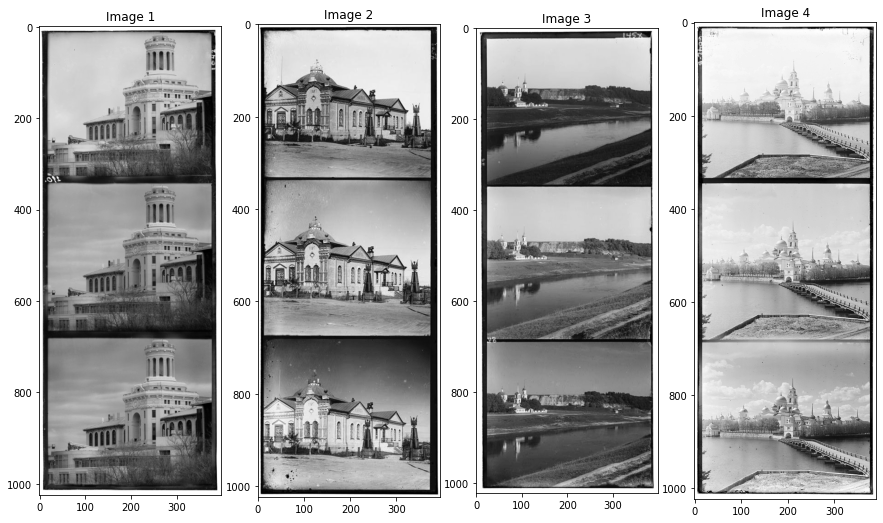

In [8]:
path1 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P2/01.jpg'
pic1 = load_pic(path1)
path2 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P2/02.jpg'
pic2 = load_pic(path2)
path3 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P2/03.jpg'
pic3 = load_pic(path3)
path4 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P2/04.jpg'
pic4 = load_pic(path4)

fig, axs = plt.subplots(1,4, figsize=(15,25))
axs[0].set_title('Image 1')
axs[0].imshow(pic1, cmap='gray')
axs[1].set_title('Image 2')
axs[1].imshow(pic2, cmap='gray')
axs[2].set_title('Image 3')
axs[2].imshow(pic3, cmap='gray')
axs[3].set_title('Image 4')
axs[3].imshow(pic4, cmap='gray')
plt.show()

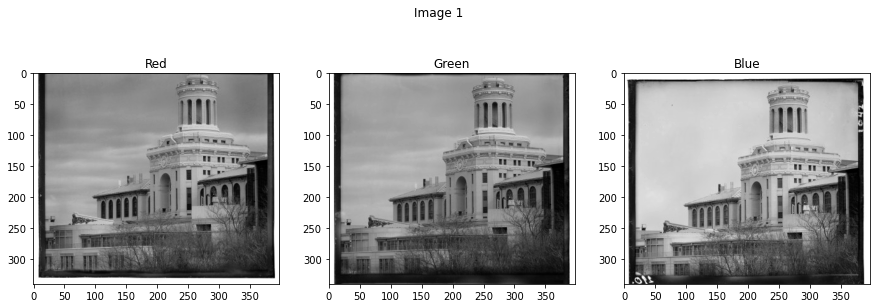

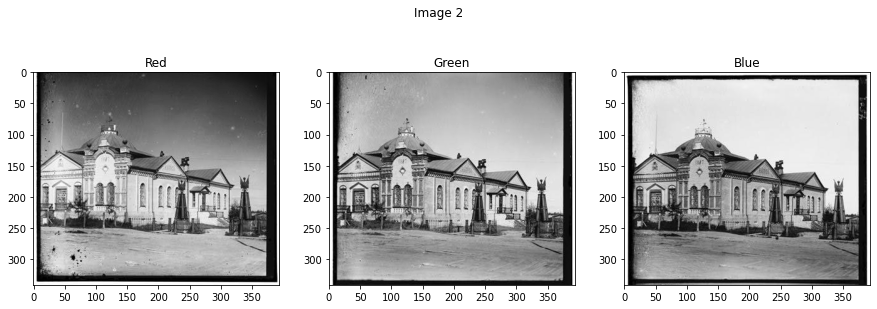

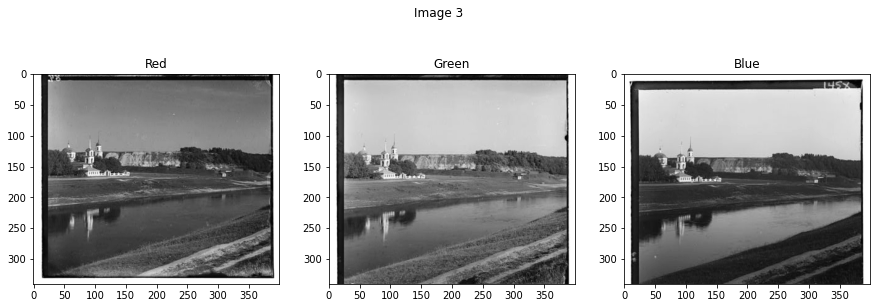

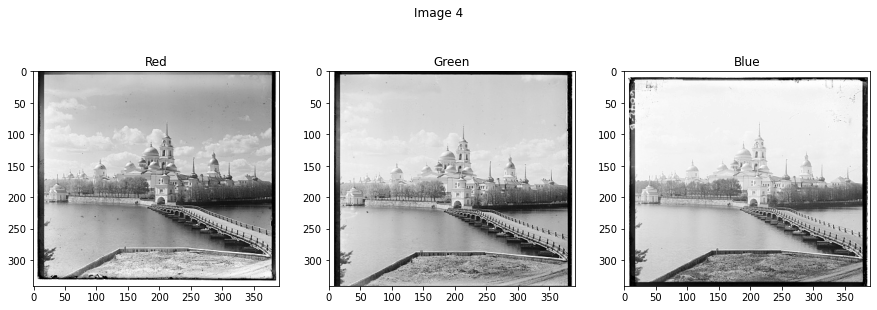

In [9]:
pic1chan1,pic1chan2,pic1chan3 = extract_channels(pic1,1)
pic2chan1,pic2chan2,pic2chan3 = extract_channels(pic2,2)
pic3chan1,pic3chan2,pic3chan3 = extract_channels(pic3,3)
pic4chan1,pic4chan2,pic4chan3 = extract_channels(pic4,4)

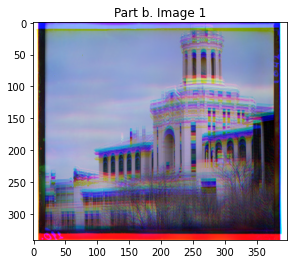

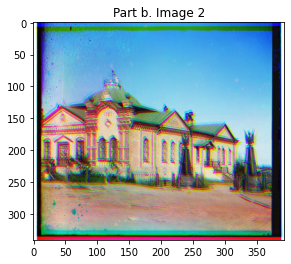

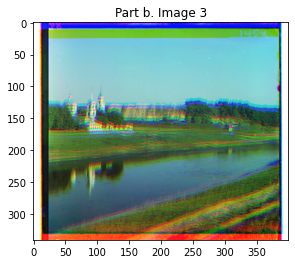

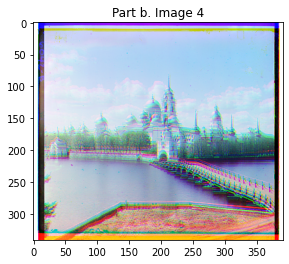

In [10]:
pic1final = stack_channels(pic1chan1,pic1chan2,pic1chan3,'Part b. Image 1')
pic2final = stack_channels(pic2chan1,pic2chan2,pic2chan3,'Part b. Image 2')
pic3final = stack_channels(pic3chan1,pic3chan2,pic3chan3,'Part b. Image 3')
pic4final = stack_channels(pic4chan1,pic4chan2,pic4chan3,'Part b. Image 4')

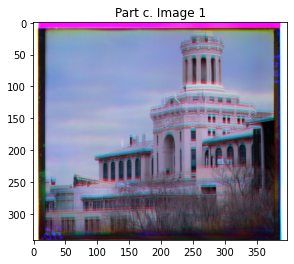

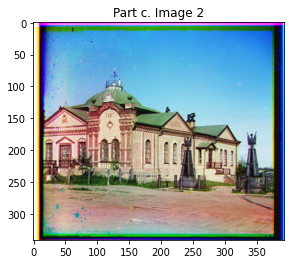

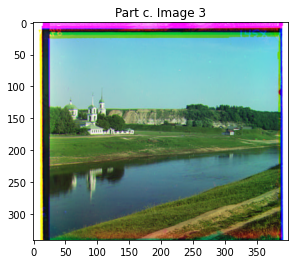

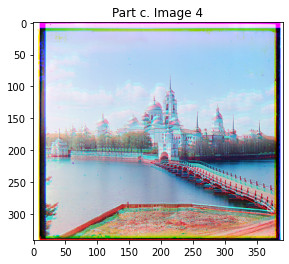

In [11]:
pic1chan1,pic1chan2,pic1chan3 = align_results(pic1chan1,pic1chan2,pic1chan3, 30)
pic1final = stack_channels(pic1chan1,pic1chan2,pic1chan3,'Part c. Image 1')

pic2chan1,pic2chan2,pic2chan3 = align_results(pic2chan1,pic2chan2,pic2chan3, 30)
pic2final = stack_channels(pic2chan1,pic2chan2,pic2chan3,'Part c. Image 2')

pic3chan1,pic3chan2,pic3chan3 = align_results(pic3chan1,pic3chan2,pic3chan3, 30)
pic3final = stack_channels(pic3chan1,pic3chan2,pic3chan3,'Part c. Image 3')

pic4chan1,pic4chan2,pic4chan3 = align_results(pic4chan1,pic4chan2,pic4chan3, 30)
pic4final = stack_channels(pic4chan1,pic4chan2,pic4chan3,'Part c. Image 4')

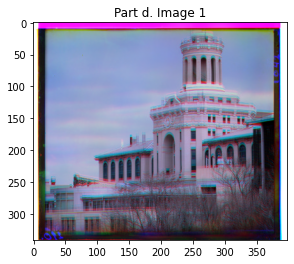

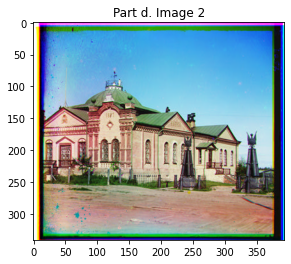

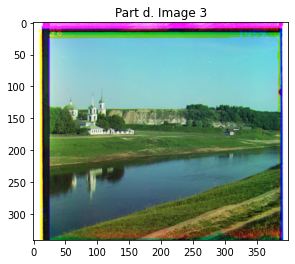

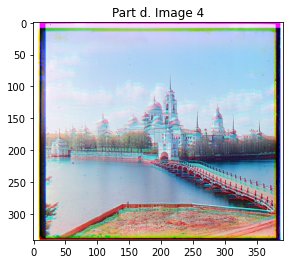

In [12]:
efficient_align(pic1chan1,pic1chan2,pic1chan3,'Part d. Image 1')
efficient_align(pic2chan1,pic2chan2,pic2chan3,'Part d. Image 2')
efficient_align(pic3chan1,pic3chan2,pic3chan3,'Part d. Image 3')
efficient_align(pic4chan1,pic4chan2,pic4chan3,'Part d. Image 4')